# Task 3 - Data Enrichment with Object Detection (YOLO) 
- by Using  modern, pre-trained YOLOv8 model to analyze images and integrate the findings into  data warehouse.

In [23]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import psycopg2
import json
import sys 
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [20]:
# loading of the function 
from src.YOLO_object_detection import create_table_if_not_exists, run_yolo_on_folders, insert_detections


## 2. PostgreSQL connection

In [ ]:
# PostgreSQL connection
conn = psycopg2.connect(
    dbname="kara_medical_db",
    user="postgres",
    password="*****",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

## create table 

In [ ]:
# Database
create_table_if_not_exists()

## 1. Load YOLOv8 pre-trained model

In [2]:


# 1. Load YOLOv8 pre-trained model
model = YOLO("yolov8n.pt")  # n = nano, can also use yolov8s.pt, yolov8m.pt, etc.


In [16]:
 detections = run_yolo_on_folders()
    


image 1/1 F:\Intelligent_Ethiopian_Medical_Business_peplines-\data\raw\telegram_messages\data_lake\Chemed123\photo_10.jpg: 640x640 (no detections), 288.3ms
Speed: 9.8ms preprocess, 288.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 F:\Intelligent_Ethiopian_Medical_Business_peplines-\data\raw\telegram_messages\data_lake\Chemed123\photo_11.jpg: 640x640 1 clock, 204.1ms
Speed: 10.4ms preprocess, 204.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 F:\Intelligent_Ethiopian_Medical_Business_peplines-\data\raw\telegram_messages\data_lake\Chemed123\photo_13.jpg: 640x640 4 hot dogs, 2 donuts, 248.2ms
Speed: 28.0ms preprocess, 248.2ms inference, 42.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 F:\Intelligent_Ethiopian_Medical_Business_peplines-\data\raw\telegram_messages\data_lake\Chemed123\photo_14.jpg: 640x480 (no detections), 1311.3ms
Speed: 113.2ms preprocess, 1311.3ms inference, 1.0ms postprocess per image at

# Overview of the detected object on the database

In [22]:

conn = psycopg2.connect(
    dbname="kara_medical_db",
    user="postgres",
    password="n5090",
    host="localhost",
    port="5432"
)

query = "SELECT * FROM analytics.fct_image_detections LIMIT 10;"
df = pd.read_sql(query, conn)

print(df.head(10))
conn.close()


   detection_id                                         image_path  \
0             1  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
1             2  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
2             3  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
3             4  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
4             5  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
5             6  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
6             7  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
7             8  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
8             9  F:/Intelligent_Ethiopian_Medical_Business_pepl...   
9            10  F:/Intelligent_Ethiopian_Medical_Business_pepl...   

  detected_object_class  confidence_score                detected_at  
0                 clock          0.427293 2025-08-21 10:48:46.203720  
1               hot dog          0.503855 2025-08-21 10:48:46.203720  
2               

C:\Users\user\AppData\Local\Temp\ipykernel_23928\3480686460.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [18]:

   
    insert_detections(detections)
    print(f"✅ Inserted {len(detections)} detections into database.")

✅ Inserted 278 detections into database.


**visualization**

In [25]:


# Connect to DB
conn = psycopg2.connect(
    dbname="kara_medical_db",
    user="postgres",
    password="n5090",
    host="localhost",
    port="5432"
)

# Load detections
query = """
SELECT detected_object_class, confidence_score, detected_at
FROM analytics.fct_image_detections;
"""
df = pd.read_sql(query, conn)
conn.close()


C:\Users\user\AppData\Local\Temp\ipykernel_23928\2127872708.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


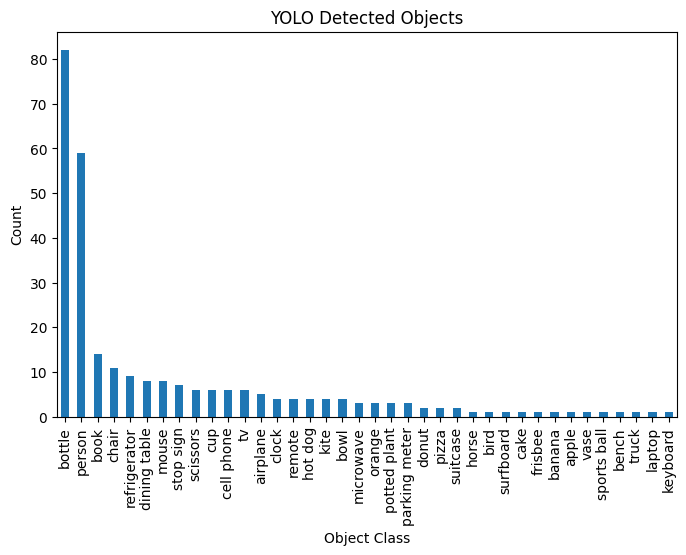

In [26]:

# Count by class
class_counts = df['detected_object_class'].value_counts()

plt.figure(figsize=(8,5))
class_counts.plot(kind="bar")
plt.title("YOLO Detected Objects")
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.show()


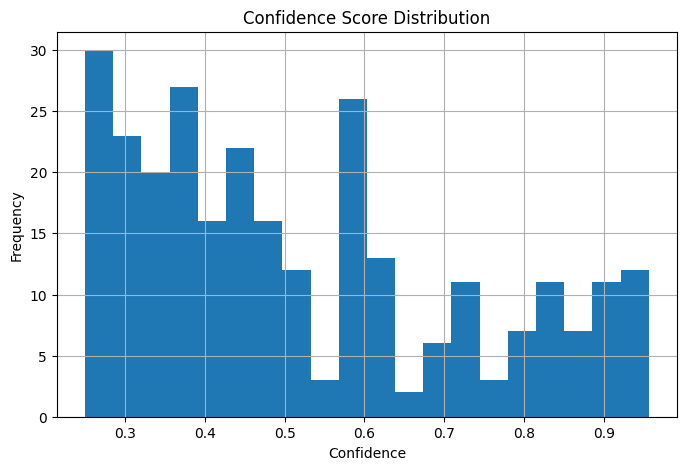

In [27]:

# Confidence distribution
plt.figure(figsize=(8,5))
df['confidence_score'].hist(bins=20)
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()
